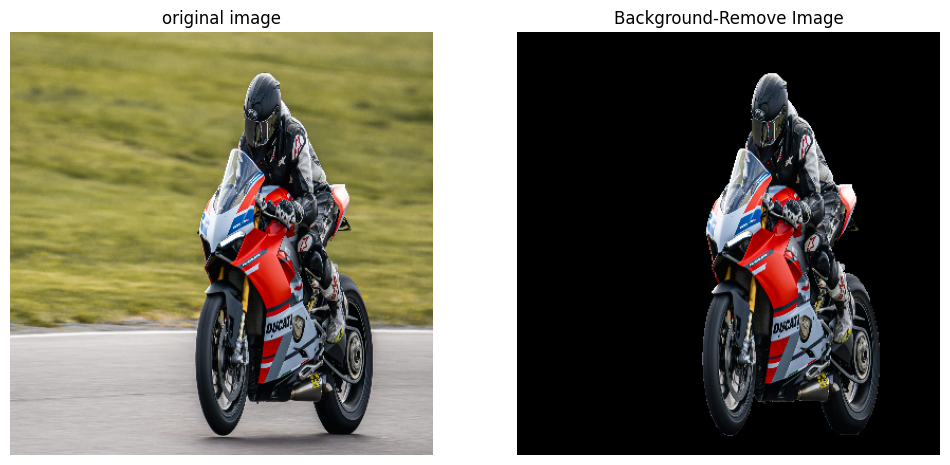

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("ASD.jpeg")
image = cv2.resize(image, (400, 400))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(image.shape[:2],np.uint8)

# Define models for Grabcut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the foreground abject
height, width = image.shape[:2]
rect = (15,15,width-30,height-30)

# Apply Grabcut
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

#(0 = background, 1 = foreground)
mask_binary=np.where((mask==2) | (mask==0),0,1).astype('uint8')

foreground = image*mask_binary[:,:,np.newaxis]

# CONVERT to RGB for correct color display
foreground_rgb=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)

# Display the result
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].imshow(image_rgb)
ax[0].set_title("original image")
ax[0].axis("off")

ax[1].imshow(foreground_rgb)
ax[1].set_title("Background-Remove Image")
ax[1].axis("off")

plt.show()

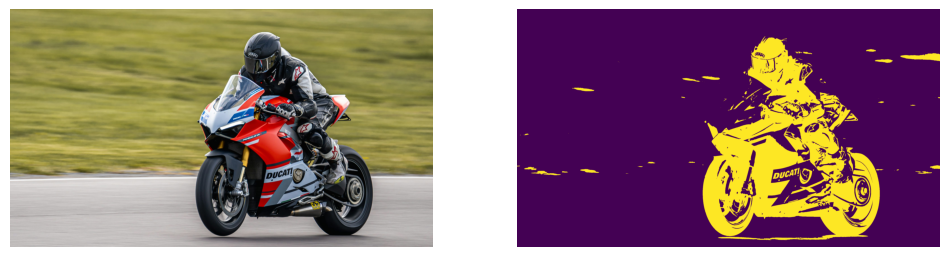

In [ ]:
from google.colab.patches import cv2_imshow

image=cv2.imread("ASD.jpeg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray,(5,5),0)

_,fg_mask=cv2.threshold(blurred,85,255,cv2.THRESH_BINARY_INV)

fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].imshow(image)
ax[0].axis("off")

ax[1].imshow(fg_mask)
ax[1].axis("off")

plt.show()